In [1]:
import pandas as pd
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from astropy.cosmology import Planck15
from astropy.cosmology import FlatLambdaCDM
from astropy.table import Table
import astropy 
from ligo.skymap.io import fits
from ligo.skymap.postprocess import find_greedy_credible_levels

import os
from os import listdir
from os.path import isfile, join

import sys

H0GLOB=67 #69
Om0GLOB=0.319
Xi0Glob =1.
cosmoglob = Planck15
clight = 2.99792458* 10**5#km/s
cosmoflag = FlatLambdaCDM(H0=H0GLOB, Om0=Om0GLOB)


        Use get instead. [ligo.skymap.postprocess.cosmology]


In [2]:
def get_ename(fname, verbose=True):

        if len(fname.split('/')[-1].split('_')) <= 2:    #Same as before since certain names contain a "_"
            event_name = fname.split('/')[-1].split('_')[0]
        elif len(fname.split('/')[-1].split('_')) > 2:
            event_name = fname.split('/')[-1].split('_')[0]+'_'+fname.split('/')[-1].split('_')[1]
        else:
            raise ValueError('Could not set event name. Got fname= %s'%fname)
        if verbose:
            print('-- %s' %event_name)
        return event_name
    
def find_ra_dec(nside, pix):
        '''
        input:  pixel ra dec in degrees
        output: (ra, dec) of pixel center in degrees, with nside given by that of the skymap 
        '''
        theta, phi =find_theta_phi(nside,pix)
        ra, dec = ra_dec_from_th_phi(theta, phi)
        return ra, dec    
    
def ra_dec_from_th_phi(theta, phi):
        ra = np.rad2deg(phi)
        dec = np.rad2deg(0.5 * np.pi - theta)
        return ra, dec
    
def find_theta_phi(nside, pix):
        '''
        input:  pixel
        output: (theta, phi)of pixel center in rad, with nside given by that of the skymap 
        '''
        return hp.pix2ang(nside, pix, nest=True)
    
def _read_O3( fname, convert_nested=True):
        
        skymap, metadata = fits.read_sky_map(fname, nest=None, distances=True) #Read the skymap
        event_name = get_ename(fname, verbose=True)
        print('Event: %s' %event_name)
        if (convert_nested) & (metadata['nest']): #If one wants RING ordering (the one of O2 data afaik) just has to set "convert_nested" to True
            p_posterior = hp.reorder(skymap[0],n2r=True)
            mu = hp.reorder(skymap[1],n2r=True)
            sigma = hp.reorder(skymap[2],n2r=True)
            posteriorNorm = hp.reorder(skymap[3],n2r=True)
            print('convertito da nested a ring')
        else:
            p_posterior= skymap[0]
            mu= skymap[1]
            sigma = skymap[2]
            posteriorNorm= skymap[3]        
        npix = len(p_posterior)
        nside=hp.npix2nside(npix)
        theta,phi=find_theta_phi(nside,np.argmax(p_posterior))
        #print('Theta={}, Phi={}'.format(theta, phi))
        #ra, dec=find_ra_dec(nside,np.argmax(p_posterior))
        #print('Right Ascension={}, Declination={}'.format(ra, dec))
        #print(metadata)
        #dl=metadata['distmean']
        #std=metadata['diststd']
        #z=cosmoglob.H(0).value*dl/clight
        #sigz=cosmoglob.H(0).value*std/clight
        #print('dL={}Mpc, std={}Mpc'.format(dl,std))
        #print('z={}, delta_z={}'.format(z,sigz))
        #print('\n')
        head = None

In [9]:
ra_dec_from_th_phi(np.pi/4,np.pi/4)

(45.0, 45.0)

In [3]:
#GWdata path
GW_data_path='/home/rciancarella/DarkSirensStat/data/GW/O3/'
os.chdir(GW_data_path)
#all_event=os.listdir()


  # Function to exploit, find how to localise an event and produce a proxy one. 
   def _read_O3(self, fname, convert_nested=True):
        
   skymap, metadata = fits.read_sky_map(fname, nest=None, distances=True) #Read the skymap
        self.event_name = get_ename(fname, verbose=self.verbose)
        if self.verbose:
                print('\nEvent: %s' %self.event_name)
                #Raul: prints for control
                print('Delta=%s. If delta=1, normal run '%delta)
        if (convert_nested) & (metadata['nest']): #If one wants RING ordering (the one of O2 data afaik) just has to set "convert_nested" to True
            self.p_posterior = hp.reorder(skymap[0],n2r=True)
            self.mu = hp.reorder(skymap[1],n2r=True)
            self.sigma = hp.reorder(skymap[2],n2r=True)*delta
            self.posteriorNorm = hp.reorder(skymap[3],n2r=True)
        else:
            self.p_posterior= skymap[0]
            self.mu= skymap[1]
            self.sigma = skymap[2]*delta
            self.posteriorNorm= skymap[3]    

In [4]:
#Some files to look at 
filenames=['GW190814_PublicationSamples.fits',
           'GW190924_021846_PublicationSamples.fits',
           'GW190412_PublicationSamples.fits',
           'GW190915_235702_PublicationSamples.fits',
           'GW190708_232457_PublicationSamples.fits',
           'GW190421_213856_PublicationSamples.fits',
           'GW190527_092055_PublicationSamples.fits' 
           ]
########################## THIS GIVE US SOME INFO ######################################
#for name in filenames:
#    _read_O3(name)
########################################################################################
fname ='GW190814_PublicationSamples.fits'
skymap, metadata = fits.read_sky_map(fname, nest=None, distances=True)

In [5]:
p_posterior= skymap[0]
mu= skymap[1]
sigma = skymap[2]
posteriorNorm= skymap[3]        
npix = len(p_posterior)
nside=hp.npix2nside(npix)
theta,phi=find_theta_phi(nside,np.argmax(p_posterior))
ra, dec=find_ra_dec(nside,np.argmax(p_posterior))
print('RA={},dec={},theta={},phi={}'.format(ra,dec,theta,phi))
#10 deg^2 =0.000 304 617 419 786 71 sr
radius_deg= np.sqrt(10/np.pi)
sigma_deg=radius_deg/2.8
circle_deg=6*sigma_deg

RA=12.7001953125,dec=-24.87076339473571,theta=2.004873035517517,phi=0.22166022384947515


In [11]:
my_theta,my_phi=hp.pix2ang(nside, np.argmax(p_posterior), nest=True)
vec = hp.ang2vec(my_theta, my_phi)
my_maxpix=hp.ang2pix(nside, my_theta, my_phi,nest=True)
maxpix=np.argmax(p_posterior)
print(maxpix,my_maxpix)

0.7853981633974483 0.7853981633974483
4266225 789504


In [ ]:
print(vec)

In [ ]:
hp.mollview(p_posterior, title=fname,nest=True)

In [ ]:
credible_levels = find_greedy_credible_levels(p_posterior)
Ligo_Area_99_deg=np.sum(credible_levels <= 0.99) * hp.nside2pixarea(nside, degrees=True)
Ligo_Area_90_deg=np.sum(credible_levels <= 0.9) * hp.nside2pixarea(nside, degrees=True)
print('Ligo area_deg 99% is {}\nLigo area_deg 90% is {} '.format(Ligo_Area_99_deg,Ligo_Area_90_deg))

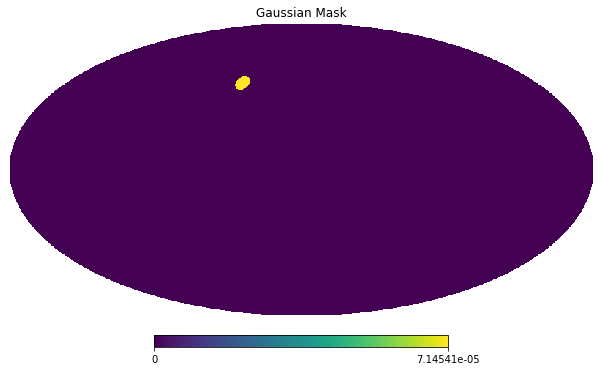

In [12]:
ipix_disc = hp.query_disc(nside=nside, vec=vec, radius=np.radians(circle_deg), nest=True)
ipix_90 = hp.query_disc(nside=nside, vec=vec, radius=np.radians(radius_deg), nest=True)
m =np.zeros(len(p_posterior))
m[ipix_disc] = 1/len(ipix_disc)
hp.mollview(m, title="Gaussian Mask",nest=True)

In [13]:
Mock_Area_deg=len(ipix_disc) * hp.nside2pixarea(nside, degrees=True)
Mock_Area_90_deg=len(ipix_90) *hp.nside2pixarea(nside, degrees=True)
print('99.9999% area is {} squared deg\n90% area is {} squared deg'.format(Mock_Area_deg,Mock_Area_90_deg))

99.9999% area is 45.882478768477654 squared deg
90% area is 9.986282981692243 squared deg


In [ ]:
'''
https://emfollow.docs.ligo.org/userguide/tutorial/skymaps.html(for ref on skymap)

Now we need to rescale the probability. We set the prob=0 ouside the circle
We assume that the renormalization is constant.
We crate a mask with our circle. Outside the mask p_posterior=0, the renormalization
constan alpha, is therefore 1/sum(p_posterior()). This ensure unitarity. 

If this works, than we will use a 2D Gaussian distribution for the probability

'''


In [ ]:
#saved_prob=np.zeros(len(p_posterior))
#saved_prob[ipix_disc]=p_posterior[ipix_disc]
#prob_to_write=np.zeros(len(p_posterior))
#alpha=1/np.sum(saved_prob)
#prob_to_write[ipix_disc]=alpha*saved_prob[ipix_disc]

In [ ]:
#print(np.sum(prob_to_write))

In [ ]:
#hp.mollview(prob_to_write, title="Mollview image NESTED",nest=True)

In [ ]:
#my_sky_tosave=(prob_to_write,skymap[1],sigma,posteriorNorm)
#my_sky_tosave=np.array([prob_to_write,mu,sigma,posteriorNorm])
#dat=Table([prob_to_write,mu,sigma,posteriorNorm],
#          names=('PROB','DISTMU','DISTSIGMA','DISTNORM'))
#dat.write('Amap.fits',format='fits',overwrite=True)
#fits.write_sky_map('Amap.fits',dat, nest=True)

In [ ]:
#check result

In [ ]:
#my_data,my_meta=fits.read_sky_map("Amap.fits",nest=None, distances=True)
#print(my_meta)

In [ ]:
#hp.mollview(my_data[0], title="Mollview image NESTED",nest=True)

In [ ]:
#print(my_meta)

In [ ]:
#_read_O3('Amap.fits')

In [14]:
sigma_theta=np.radians(sigma_deg)*1.95
sigma_phi=np.radians(sigma_deg)*1.95
my_theta=np.pi/4
my_phi=np.pi/4
#print(my_theta,my_phi)
def uncorr_gauss(x,y,mux=my_theta,muy=my_phi,sigx=sigma_theta,sigy=sigma_phi):
    #correlation is 0 so is a multiplication of two gaussians
    xfactor=((x-mux)/sigx)**2
    yfactor=((y-muy)/sigy)**2
    #norm=2*np.pi*sigx*sigy
    ret=np.exp(-(1/2)*(xfactor+yfactor))#/norm
    return ret

In [15]:
gaussmap =np.zeros(len(p_posterior))
mod_mu=np.zeros(len(p_posterior))
zref=1
dlref=(1+zref)*cosmoflag.comoving_distance(zref).value
print(dlref)
peakdl=mu[np.argmax(p_posterior)]
diff=abs(dlref-peakdl)

6827.38271411155


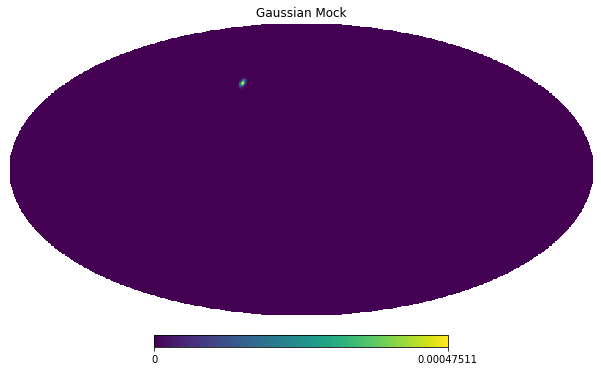

In [16]:
for i in ipix_disc:
    theta,phi=hp.pix2ang(nside,i, nest=True)
    gaussmap[i]=uncorr_gauss(theta,phi)*hp.nside2pixarea(nside, degrees=True)
    mod_mu[i]=mu[i]+diff
#gaussmap[ipix_disc] = 1/len(ipix_disc)
gaussmap[ipix_disc]=gaussmap[ipix_disc]/np.sum(gaussmap)
hp.mollview(gaussmap, title="Gaussian Mock",nest=True)

In [ ]:
#print(gaussmap[gaussmap>0])

In [17]:
print(np.max(p_posterior))
print(np.max(gaussmap))
print(np.max(mod_mu))

0.0006588459413258549
0.00047931139612870233
6596.272043028382


In [18]:
np.sum(gaussmap)

1.0

In [19]:
#my_sky_tosave=(gaussmap,mu,sigma,posteriorNorm)
my_sky_tosave=np.array([gaussmap,mod_mu,sigma,posteriorNorm])
dat=Table([gaussmap,mu,sigma,posteriorNorm],
          names=('PROB','DISTMU','DISTSIGMA','DISTNORM'))
#dat.write('Amap.fits',format='fits',overwrite=True)
fits.write_sky_map('GW220810_PublicationSamples.fits',dat, nest=True)

In [ ]:
#my_data,my_meta=fits.read_sky_map("GW220809_PublicationSamples.fits",nest=None, distances=True)

In [ ]:
#my_data[0]
#npix = len(my_data[0])
#nside=hp.npix2nside(npix)

In [ ]:
#credible_levels = find_greedy_credible_levels(gaussmap)
#Ligo_Area_99_deg=np.sum(credible_levels <= 0.99) * hp.nside2pixarea(nside, degrees=True)
#Ligo_Area_90_deg=np.sum(credible_levels <= 0.9) * hp.nside2pixarea(nside, degrees=True)
#print('Ligo area_deg 99% is {}\nLigo area_deg 90% is {} '.format(Ligo_Area_99_deg,Ligo_Area_90_deg))
